In [22]:
!pip install mecab-python3 unidic
!python -m unidic download

download url: https://cotonoha-dic.s3-ap-northeast-1.amazonaws.com/unidic-3.1.0.zip
Dictionary version: 3.1.0+2021-08-31
Finished download.



unidic-3.1.0.zip: 0.00B [00:00, ?B/s]
unidic-3.1.0.zip:   0%|          | 8.19k/526M [00:01<23:33:40, 6.20kB/s]
unidic-3.1.0.zip:   0%|          | 524k/526M [00:01<20:26, 428kB/s]     
unidic-3.1.0.zip:   0%|          | 737k/526M [00:01<17:35, 498kB/s]
unidic-3.1.0.zip:   0%|          | 860k/526M [00:02<15:10, 577kB/s]
unidic-3.1.0.zip:   0%|          | 958k/526M [00:02<13:56, 627kB/s]
unidic-3.1.0.zip:   0%|          | 1.06M/526M [00:02<12:32, 698kB/s]
unidic-3.1.0.zip:   0%|          | 1.39M/526M [00:02<07:26, 1.18MB/s]
unidic-3.1.0.zip:   0%|          | 1.62M/526M [00:02<06:15, 1.40MB/s]
unidic-3.1.0.zip:   0%|          | 1.73M/526M [00:02<08:05, 1.08MB/s]
unidic-3.1.0.zip:   0%|          | 1.84M/526M [00:02<08:14, 1.06MB/s]
unidic-3.1.0.zip:   0%|          | 1.93M/526M [00:02<08:25, 1.04MB/s]
unidic-3.1.0.zip:   0%|          | 2.05M/526M [00:02<08:14, 1.06MB/s]
unidic-3.1.0.zip:   0%|          | 2.16M/526M [00:03<08:10, 1.07MB/s]
unidic-3.1.0.zip:   0%|          | 2.21M/526M [00:03

In [23]:
import MeCab
import unidic
mecab = MeCab.Tagger()#MeCab.Tagger()で形態素解析をするための辞書を指定
with open("neko.txt","r") as f,open("neko.txt.mecab","w") as f2:
    # "neko.txt"を読み込みモードで開き、"neko.txt.mecab"を書き込みモードで開く
    lines = f.readlines()# ファイルの全行を読み込む
    for text in lines:
        result = mecab.parse(text)# 各行をMeCabで形態素解析
        f2.write(result)# 解析結果を新しいファイルに書き込む

30

In [28]:
with open("neko.txt.mecab", "r") as f:
    general_list = [] # 文章ごとの形態素情報を格納するリスト
    neko_list = []# 1文章内の形態素情報を一時的に格納するリスト
    lines = f.readlines()
    for text in lines:
        neko_dic = {} # 各形態素の情報を格納する辞書
        suf = text.split("\t")
        if suf[0] == "EOS\n":
            continue # 文の終わりを示す行は無視
        temp = suf[1].split(',')# カンマで品詞情報を分割
        neko_dic["surface"] = suf[0]# 表層形（元の文字列）を辞書に追加
        # 基本形の処理
        if len(temp) <= 7:
            neko_dic["base"] = suf[0]# 短い情報の場合は表層形を基本形とする
        else:
            neko_dic["base"] = temp[7]# 7番目の要素が基本形

        # 品詞情報を辞書に追加
        neko_dic["pos"] = temp[0] # 品詞
        neko_dic["pos1"] = temp[1] # 品詞細分類

        # 形態素情報を一時リストに追加
        neko_list.append(neko_dic)
        # 文末（。）を検出したら
        if suf[0] == "。":
            general_list.append(neko_list) # 文章リストを全体リストに追加
            neko_list = []# 一時リストをリセット
general_list

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数詞'},
  {'surface': '\u3000', 'base': '\u3000', 'pos': '空白', 'pos1': ''},
  {'surface': '吾輩', 'base': '我が輩', 'pos': '代名詞', 'pos1': ''},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': ''},
  {'surface': 'ある', 'base': '有る', 'pos': '動詞', 'pos1': '非自立可能'},
  {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': '未だ', 'pos': '副詞', 'pos1': ''},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '非自立可能'},
  {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '空白', 'pos1': ''},
  {'surface': 'どこ', 'base': '何処', 'pos': '代名詞', 'pos1': ''},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞

31.同氏の表層形をすべて抽出せよ

In [30]:
suf_list = []#このリストには動詞の表層形（実際に文章に現れた形）を格納し
for sentense in general_list:
    #各文章の中の個々の形態素について繰り返し処理を行います
    for text in sentense:
        if text["pos"] == "動詞":#その形態素の品詞が「動詞」である場合
            suf_list.append(text["surface"])#動詞の表層形（元の文字列）をsuf_listに追加します
verb = set(suf_list)#suf_listをセット（重複のない集合）に変換します
verb

{'逢わ',
 '立ち至り',
 '焦れる',
 '怠っ',
 '敬す',
 '論ずる',
 'よそい',
 '働け',
 '出向い',
 '問い正す',
 'やま',
 '光らし',
 '立っ',
 '飽き足ら',
 '産する',
 '縮まる',
 '開き',
 '縊っ',
 'なら',
 'おく',
 '見透かさ',
 '恐れ',
 '懸かっ',
 '続か',
 '尋ねる',
 '伝え',
 '疲れ',
 '待ち',
 '優る',
 '斬り付け',
 '逢っ',
 '力める',
 'やれる',
 '俯向い',
 '働か',
 '出懸け',
 '衒い',
 '怒鳴りつけれ',
 '失っ',
 '脱が',
 '踏み',
 '見れ',
 '用',
 '明け放し',
 '突き出し',
 '渡り',
 '減っ',
 '添え',
 '構い',
 '認め',
 '弱り',
 '留まる',
 'たくっ',
 'おき',
 'いえ',
 '申し聞ける',
 '蒙り',
 '引きつけ',
 '返る',
 '惹い',
 '売り',
 'とどめ',
 '押し出す',
 'すくん',
 '誘い出し',
 'なろう',
 '仆れる',
 '命じ',
 '見えよう',
 '起せ',
 '食い殺さ',
 '続く',
 '吹き',
 '尽',
 '廻わる',
 '釣り込ま',
 '割い',
 '下がっ',
 '出来上がっ',
 '射る',
 'ほめ',
 '込む',
 '招い',
 '陥っ',
 '吐く',
 '養なわ',
 '挟む',
 '営む',
 'おこす',
 '見送っ',
 '舞わす',
 '曲がろう',
 '煎じ',
 '終る',
 'いよう',
 '踏張る',
 'かこう',
 '改める',
 '能わ',
 'あてがえ',
 '好む',
 '帰する',
 '改まる',
 '造る',
 '掛っ',
 'けり',
 '怒鳴り',
 '浴びせ掛ける',
 '好ん',
 '茂っ',
 'じれ',
 '張りたて',
 '断わっ',
 '生ずる',
 'くらむ',
 '申し渡し',
 '抜け',
 '期し',
 '噛み切ろう',
 '繰り返す',
 '見せびらかす',
 '勤まる',
 'はね',
 'いただき',
 '動く',
 '寄り',
 '苦しん',
 '結べ',
 '叩き付ける',


セットに変換する主な理由は以下の通りです：

重複の排除


同じ動詞が何度も出現する場合、セットにすることで重複を自動的に削除できます
例えば、「走る」という動詞が文章中に3回出現しても、セットにすると1回のみ残ります


ユニークな要素の抽出


テキスト内で使用されているすべての一意の動詞を知りたい場合に便利です
語彙の多様性や使用されている動詞の種類を分析するのに役立ちます


高速な検索と比較


セットは内部的にハッシュテーブルを使用しているため、要素の存在確認が非常に高速です
メモリ効率も良くなります

具体例：
pythonCopy# リストの場合
suf_list = ['走る', '食べる', '走る', '書く', '食べる']
print(suf_list)  # ['走る', '食べる', '走る', '書く', '食べる']

# セットの場合
verb_set = set(suf_list)
print(verb_set)  # {'走る', '食べる', '書く'}
このように、セットは重複を自動的に排除し、ユニークな要素のコレクションを提供します。

32.動詞の基本形を全て抽出せよ

In [ ]:
# 動詞の基本形を格納するための空のリストを初期化
base_list = []

# general_listの各文章（sentence）を繰り返し処理
for sentense in general_list:
    # 各文章内の各形態素（text）を繰り返し処理
    for text in sentense:
        # その形態素の品詞が「動詞」の場合
        if text["pos"] == "動詞":
            # 動詞の基本形をbase_listに追加
            base_list.append(text["base"])

# base_listから重複を削除したセットを作成
base_verb = set(base_list)

# 結果を表示
base_verb

{'焦れる',
 '論ずる',
 '浮き上がる',
 '立ち寄る',
 '寝過ごす',
 'ひっぺがす',
 '産する',
 '了する',
 '縮まる',
 '縫い合わせる',
 '攻める',
 '焚き出す',
 '傷付ける',
 '尋ねる',
 '揉む',
 '写す',
 '蕩ける',
 '蹴る',
 '魅入られる',
 '苦しめる',
 '使い分ける',
 '締め付ける',
 '草臥れる',
 '申し聞ける',
 '辞する',
 '返る',
 '押し出す',
 '駆け上る',
 '続く',
 '転がす',
 '射る',
 '投げ出す',
 '込む',
 '吐く',
 '挟む',
 '営む',
 '追い掛ける',
 '棚引く',
 '擦り抜ける',
 '舞わす',
 '澄ます',
 '浮かぶ',
 '謝る',
 '改める',
 '帰する',
 '好む',
 '改まる',
 '押し倒す',
 '躱す',
 '浴びせ掛ける',
 '日暮れる',
 '植える',
 '懲らしめる',
 '生ずる',
 '浮かれる',
 '灯す',
 '経つ',
 '引き立つ',
 '繰り返す',
 '見せびらかす',
 '勤まる',
 '動く',
 '叩き付ける',
 '引き続く',
 '食う',
 '転ずる',
 '分捕る',
 '立つ',
 '怒鳴り付ける',
 '連れ添う',
 '禿げる',
 '担ぐ',
 '催す',
 '遡る',
 '担う',
 '伸す',
 '司る',
 '現われる',
 '呼び掛ける',
 'ちょん切る',
 '回す',
 '降る',
 '蒸す',
 '押し合う',
 '倦む',
 '奉ずる',
 '逝く',
 '穿る',
 '切る',
 '欺く',
 '説き出す',
 '埋め合わす',
 '描き出す',
 '叱り付ける',
 '咲く',
 '思い込む',
 'ぶら下がる',
 '脱ぎ捨てる',
 '荒立てる',
 '取り合う',
 '逃れる',
 '貸す',
 '見渡す',
 '開き直る',
 '剥がれる',
 '流れる',
 '辱む',
 '躍らす',
 '出掛ける',
 '扱う',
 '怨ずる',
 '引っ繰り返す',
 '集る',
 '決め込む',
 '頻る',
 '吹き通す',
 '落ち着く',
 '増える',
 '縮める',
 '足す',
 '届

33.2つの名詞が「の」で連結されている名詞句を抽出せよ

In [42]:
# 「の」を含む名詞句を格納するための空のリストを初期化
no_list = []

# general_listの各文章（sentence）を繰り返し処理
for sentense in general_list:
    # 文章内の各形態素の位置を特定するためにrange()を使用
    for i in range(len(sentense)):
        # 以下の3つの条件を同時にチェック：
        # 1. 現在の形態素が「の」である
        # 2. 前の形態素（sentense[i-1]）が名詞である
        # 3. 次の形態素（sentense[i+1]）が名詞である
        if (sentense[i]["surface"] == "の" and 
            sentense[i-1]["pos"] == "名詞" and 
            sentense[i+1]["pos"] == "名詞"):
            
            # 条件に合致した場合、「名詞1 + の + 名詞2」の形式で no_list に追加
            no_list.append(sentense[i-1]["surface"] + "の" + sentense[i+1]["surface"])

# 結果を表示
no_list

['掌の上',
 '書生の顔',
 'はずの顔',
 '顔の真中',
 '穴の中',
 '書生の掌',
 '掌の裏',
 '藁の上',
 '笹原の中',
 '池の前',
 '一樹の蔭',
 '垣根の穴',
 '隣家の三毛',
 '時の通路',
 '一刻の猶予',
 '家の内',
 '以外の人間',
 '前の書生',
 '胸の痞',
 '家の主人',
 '主人の方',
 'なしの小猫',
 '鼻の下',
 '自分の住家',
 '家のもの',
 'うちのもの',
 '本の上',
 '皮膚の色',
 '本の上',
 '以外のもの',
 '主人の傍',
 '膝の上',
 '経験の上',
 '飯櫃の上',
 '炬燵の上',
 'うちの小供',
 '小供の寝床',
 '小供の一人',
 '例の神経',
 '次の部屋',
 '自分の勝手',
 'へっついの中',
 '台所の板の間',
 '家の書生',
 '裏の池',
 '親子の愛',
 '隣りの三毛',
 '目刺の頭',
 '鰡の臍',
 '軍人の家',
 '代言の主人',
 '教師の家',
 '猫の時節',
 '家の主人',
 '胃弱の癖',
 '後架の中',
 '平の宗盛',
 '月の月給',
 '主人の述懐',
 '金縁の眼鏡',
 '主人の顔',
 '室内の想像',
 '訳のもの',
 '利の大家',
 '金縁の裏',
 '顔のあたり',
 '上乗の出来',
 '顔の造作',
 '他の猫',
 '斑入りの皮膚',
 '主人の彩色',
 '一種の色',
 '身内の筋肉',
 '主人の予定',
 '座敷の中',
 '人の気',
 '自己の力量',
 '人間の不徳',
 '家の裏',
 'うちの小供',
 '日の二',
 'たこの茶園',
 '茶の木',
 '木の根',
 '西側の杉垣',
 '杉垣のそば',
 '他の庭内',
 '皮膚の上',
 '柔毛の間',
 '嘆賞の念',
 '好奇の心',
 '小春の風',
 '杉垣の上',
 '梧桐の枝',
 '枯菊の茂み',
 '真丸の眼',
 '人間の珍重',
 '双眸の奥',
 '額の上',
 '声の底',
 '教師の家',
 '良家の猫',
 '車屋の黒',
 '車屋の黒',
 '主義の的',
 '軽侮の念',
 '左の問答',
 '車屋の方',
 'うちの主人',
 '車屋

34.名詞の連接（連続して出現する名詞）を最小一致法で抽出せよ

In [ ]:
# 連続する名詞のリストを格納するための空のリストを初期化
noun_list = []

# general_listの各文章（sentence）を繰り返し処理
for sentense in general_list:
    # 連続する名詞の数をカウントする変数を初期化
    count = 0
    # 連続する名詞の文字列を格納する変数を初期化
    sent = ""

    # 文章内の各形態素の位置をインデックス`i`で追跡
    for i in range(len(sentense)):
        # 現在の形態素が名詞の場合
        if sentense[i]["pos"] == "名詞":
            # カウンターをインクリメント
            count += 1
            # 名詞の表層形を文字列に追加
            sent += sentense[i]["surface"]
        else:
            # 2回以上連続する名詞が見つかった場合
            if count >= 2:
                # その名詞列をリストに追加
                noun_list.append(sent)
            
            # カウンターとsentをリセット
            count = 0
            sent = ""

# noun_listから重複を削除したセットを作成
noun_set = set(noun_list)

# 結果を表示
noun_set

{'四寸',
 '螺旋鋲',
 '天然居士以上',
 '舌肉',
 '大燈国師',
 '未遂入水',
 '小泉八雲先生',
 'ため逆上',
 'ため外出',
 'そもそも恋',
 'リーシャス',
 '返答次第',
 '二十通り',
 '毛袋',
 'アルプス山',
 '半襦袢',
 '少々峻嶮',
 '重太郎先生',
 '摩擦術',
 '代議政体',
 '実際奇警',
 'びらかす',
 '花聟花嫁',
 '家内総がかり',
 '器械なし',
 '金田家',
 '通り鵯越',
 '張本金田',
 '天地開闢以来',
 '候段',
 '三方',
 '八方睨み',
 '模範勝手',
 '後架後架',
 'いたずら者',
 '宗谷海峡',
 '黒繻子',
 '居候次第',
 '三平連',
 '隣り近所',
 '何だい',
 '勢い向う側',
 '通り多少瘋癲',
 '時先生',
 '日本一',
 '雌猫雄猫',
 '平均男子',
 '平穏至極',
 '西洋洗濯',
 '竜頭蛇尾',
 '先幾',
 '口返答',
 '程度以上',
 '万年一念',
 '仮鼻',
 '女生徒',
 '十四通り',
 '鼠式部',
 '長坂橋',
 'あと大',
 '作戦計画',
 '家内平穏',
 '三ぜん',
 '羅甸語',
 '三十面',
 '憚御休心可',
 '一二年欧州',
 '周囲一尺',
 '吉備団子',
 '一件',
 '一尺立方',
 '晩鼠',
 '曰く火',
 '方来客',
 '伊予絣',
 '甘木先生',
 '軽便信用',
 '根拠地',
 '彼岸桜',
 '裸体像',
 '成居候',
 '先刻主人',
 '心理作用',
 '未来際方',
 '俳体詩',
 '現今地球',
 'せんだって妻',
 '土俵際',
 'ゃごおうにゃごおうと三度',
 '西洋婦人',
 '御山婦美',
 '十四五',
 '四五通',
 '七時',
 '一辺',
 '焦熱地獄',
 '曰く運動',
 '事草履',
 '薩摩下駄',
 '日藤',
 '旅順陥落',
 '十二三年以前',
 '大道易者',
 '両足以外',
 'マイナス三分刈',
 '先刻洗濯石鹸',
 '一坪いくら',
 'こないだ東京',
 '今日歓迎',
 '蝉気',
 'まま無言',
 '毎月二円',
 '戸迷い',
 

In [ ]:
35.文章中に出現する単語とその出現頻度を求め、出現頻度の高い順に並べよ

In [46]:
# collectionsモジュールをインポート（出現頻度のカウントに使用）
import collections

# 単語を格納するための空のリストを初期化
word_list = []

# general_listの各文章（sentence）を繰り返し処理
for sentense in general_list:
    # 文章内の各形態素の位置をインデックス`i`で追跡
    for i in range(len(sentense)):
        # 以下の条件に該当しない形態素のみを処理
        # 補助記号、助詞、助動詞を除外
        if (sentense[i]["pos"] != "補助記号" and 
            sentense[i]["pos"] != "助詞" and 
            sentense[i]["pos"] != "助動詞"):
            
            # 条件に合致した形態素の表層形をword_listに追加
            word_list.append(sentense[i]["surface"])

# word_listの要素の出現頻度をカウント
c = collections.Counter(word_list)

# 出現頻度の高い順に要素を抽出
c35 = c.most_common()

# 結果を表示
c35

[('し', 2471),
 ('ある', 1726),
 ('ない', 1314),
 ('いる', 1255),
 ('事', 1212),
 ('する', 1055),
 ('もの', 973),
 ('君', 971),
 ('云う', 937),
 ('主人', 934),
 ('何', 715),
 ('御', 707),
 ('よう', 683),
 ('この', 655),
 ('その', 620),
 ('それ', 612),
 ('そう', 570),
 ('一', 490),
 ('人', 486),
 ('吾輩', 481),
 ('これ', 472),
 ('どう', 413),
 ('\u3000', 411),
 ('なっ', 408),
 ('さん', 401),
 ('なる', 395),
 ('い', 383),
 ('来', 383),
 ('ところ', 383),
 ('見', 366),
 ('時', 351),
 ('迷亭', 343),
 ('方', 321),
 ('いい', 319),
 ('上', 298),
 ('寒月', 286),
 ('人間', 279),
 ('顔', 277),
 ('先生', 274),
 ('見る', 273),
 ('僕', 270),
 ('そんな', 259),
 ('また', 256),
 ('中', 254),
 ('あり', 247),
 ('云っ', 241),
 ('猫', 238),
 ('三', 238),
 ('気', 233),
 ('思っ', 232),
 ('出来', 232),
 ('出', 231),
 ('あっ', 221),
 ('今', 221),
 ('二', 217),
 ('細君', 212),
 ('彼', 206),
 ('なく', 203),
 ('間', 201),
 ('少し', 197),
 ('者', 197),
 ('しかし', 190),
 ('あの', 189),
 ('なら', 179),
 ('自分', 175),
 ('ちょっと', 171),
 ('頭', 167),
 ('訳', 159),
 ('ただ', 156),
 ('前', 156),
 ('声', 156),
 ('いう', 155),
 ('うち'

Python標準ライブラリcollectionsにCounterクラスがある。

collections.Counter --- コンテナデータ型 — Python 3.11.3 ドキュメント
collections.Counter()にリストやタプルを渡すと、Counterオブジェクトが生成される。Counterは辞書型dictのサブクラスで、キーに要素、値に出現回数という形のデータを持つ。

import collections

l = ['a', 'a', 'a', 'a', 'b', 'c', 'c']

c = collections.Counter(l)
print(c)
# Counter({'a': 4, 'c': 2, 'b': 1})

print(type(c))
# <class 'collections.Counter'>

print(issubclass(type(c), dict))
# True
Counterにはmost_common()メソッドがあり、(要素, 出現回数)という形のタプルを出現回数順に並べたリストを返す。

l = ['a', 'a', 'a', 'a', 'b', 'c', 'c']

c = collections.Counter(l)
print(c)
# Counter({'a': 4, 'c': 2, 'b': 1})

print(c.most_common())
# [('a', 4), ('c', 2), ('b', 1)]

36.出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ

In [ ]:
!pip install japanize-matplotlib #matplotlibで日本語を表示できるようにする

     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     --------------------------------- ------ 3.4/4.1 MB 22.3 MB/s eta 0:00:01
     ---------------------------------------- 4.1/4.1 MB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120277 sha256=ef0d20bfe70cd5ab732bff30da4c6e981c9c4e398747a878582d9eff70001e68
  Stored in directory: c:\users\山田有沙人\appdata\local\pip\cache\wheels\c1\f7\9b\418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


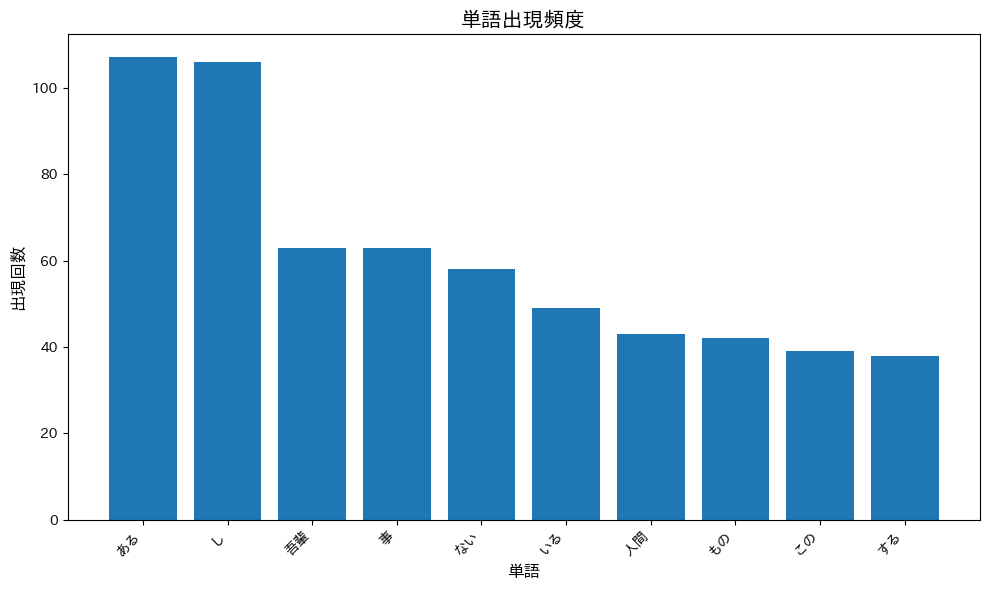

In [92]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

# 前の処理で作成した単語リストと出現頻度リストを初期化
word_list = []      # 上位10単語を格納
height_list = []    # それぞれの出現頻度を格納

# 上位10単語の抽出
for i in range(10):
    # 前の問題で作成したcから、上位10単語を抽出
    word_list.append(c.most_common()[:10][i][0])  # 単語
    height_list.append(c.most_common()[:10][i][1])  # 出現頻度

plt.figure(figsize=(10, 6))  # グラフのサイズを指定
plt.bar(x = word_list, height = height_list)
plt.title('単語出現頻度', fontsize=15)  # タイトル
plt.xlabel('単語', fontsize=12)  # X軸ラベル
plt.ylabel('出現回数', fontsize=12)  # Y軸ラベル
plt.xticks(rotation=45, ha='right')  # X軸ラベルを45度回転
plt.tight_layout()  # レイアウト調整
plt.show()

37.「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ

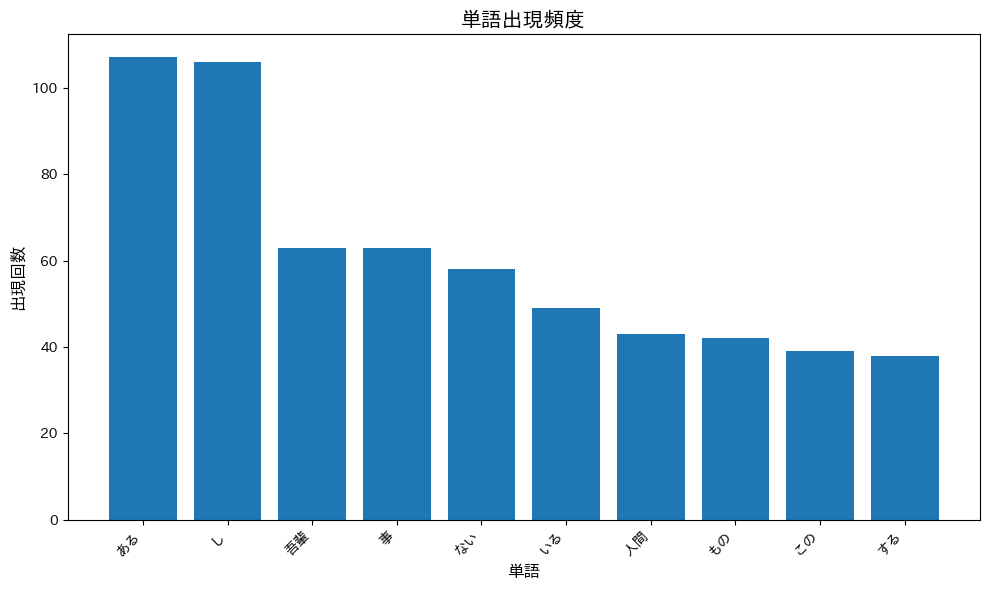

In [93]:
%matplotlib inline
# itertoolsモジュールをインポート（リストの操作に使用）
import itertools

# 「猫」が含まれる文章の単語リストを格納するための空のリストを初期化
neko_list = []

# general_listの各文章（sentence）を繰り返し処理
for sentense in general_list:
    # その文章の単語を格納する一時リスト
    text37 = []
    # 「猫」が出現したことを示すフラグ
    Flag = 0
    
    # 文章内の各形態素を処理
    for text in sentense:
        # 「猫」が含まれる形態素を見つけたら
        if "猫" in text["surface"]:
            # フラグを立てて
            Flag = 1
            # その形態素をスキップ
            continue
        
        # 補助記号、助詞、助動詞以外の形態素のみを処理
        if (text["pos"] != "補助記号" and 
            text["pos"] != "助詞" and 
            text["pos"] != "助動詞"):
            # 形態素の表層形をtext37リストに追加
            text37.append(text["surface"])
    
    # 「猫」が出現した文章のみをneko_listに追加
    if Flag == 1:
        neko_list.append(text37)

# neko_listを1次元のリストに平坦化
all_neko = list(itertools.chain.from_iterable(neko_list))

# 単語の出現頻度をカウント
c = collections.Counter(all_neko)

# 上位10単語のリストを準備
word_list = []
height_list = []
for i in range(10):
    word_list.append(c.most_common()[:10][i][0])    # 単語
    height_list.append(c.most_common()[:10][i][1])  # 出現回数

# グラフの描画
plt.figure(figsize=(10, 6))  # グラフのサイズを指定
plt.bar(x = word_list, height = height_list)
plt.title('単語出現頻度', fontsize=15)  # タイトル
plt.xlabel('単語', fontsize=12)  # X軸ラベル
plt.ylabel('出現回数', fontsize=12)  # Y軸ラベル
plt.xticks(rotation=45, ha='right')  # X軸ラベルを45度回転
plt.tight_layout()  # レイアウト調整
plt.show()

38.単語の出現頻度のヒストグラムを描け、ただし、横軸は出現頻度を表し、1から単語の出現頻度の最大値までの線形目盛とする、横軸はｘ軸で示される出現頻度となった単語の異なり数（種類数）である

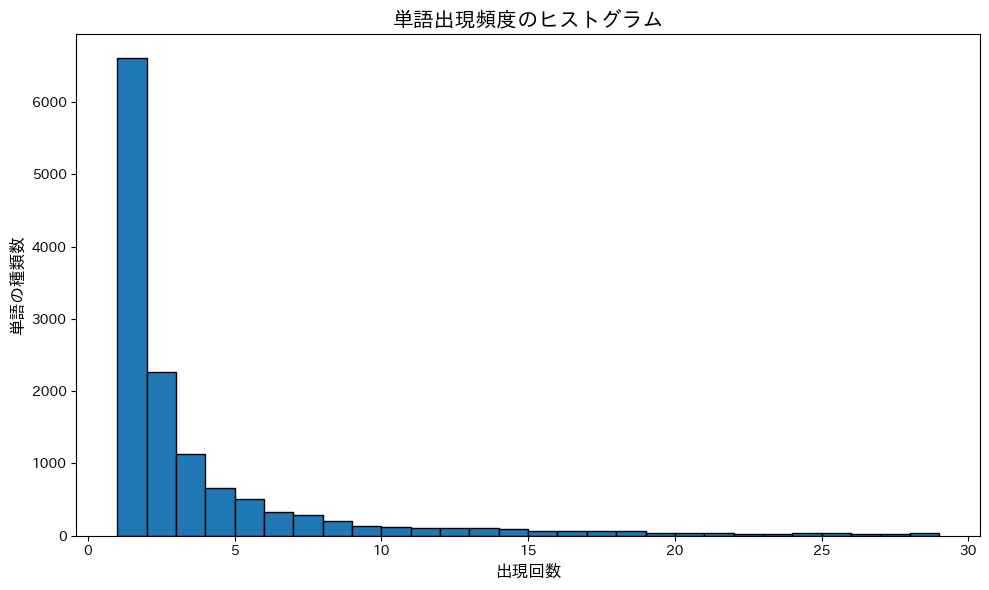

In [100]:
# グラフを描画する前に、既存のグラフをクリア
plt.clf()  # 現在のフィギュアをクリア
plt.close('all')  # すべてのフィギュアを閉じる
%matplotlib inline

# 単語のリストを初期化
word_list = []

# general_listの各文章から単語の表層形を抽出
for sentense in general_list:
    for text in sentense:
        word_list.append(text["surface"])

# 単語の出現頻度をカウント
data38 = collections.Counter(word_list)

# グラフの前処理
plt.figure(figsize=(10, 6))  # グラフのサイズを指定

# ヒストグラムの描画
plt.hist(list(data38.values()), bins=range(1, 30), edgecolor='black')

# グラフの装飾
plt.title('単語出現頻度のヒストグラム', fontsize=15)
plt.xlabel('出現回数', fontsize=12)
plt.ylabel('単語の種類数', fontsize=12)
plt.tight_layout()

# グラフの表示
plt.show()

39.Zipfの法則

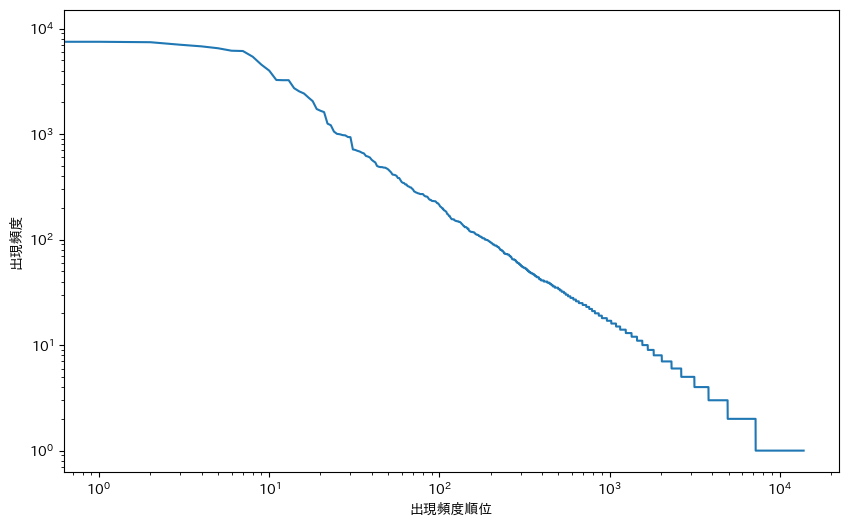

In [ ]:
# 既存のグラフをクリアし、新しいグラフ描画の準備
plt.clf()  # 現在のフィギュアをクリア
plt.close('all')  # すべてのフィギュアを閉じる
%matplotlib inline
word_list = []# 単語リストを初期化
# general_listの各文章から単語の表層形を抽出
for sentense in general_list:
    for text in sentense:
        word_list.append(text["surface"])
data39 = collections.Counter(word_list)# 単語の出現頻度をカウント
temp2 = sorted(data39.values(), reverse=True)# 出現頻度を降順でソート
plt.figure(figsize=(10, 6))# グラフのサイズと設定を指定
plt.plot(temp2)# グラフのサイズと設定を指定
plt.xlabel("出現頻度順位")
plt.ylabel("出現頻度")
# 現在の軸を取得
ax = plt.gca()
# Y軸を対数スケールに設定
ax.set_yscale("log")
# X軸を対数スケールに設定
ax.set_xscale("log")
# グラフを表示
plt.show()  